# Automated Stacking

Stacking is an ensemble technique where you use predictions as features

Predict from which of three cultivars in Italy the wine was derived

In [32]:
#import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from vecstack import stacking
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [7]:
#read data
link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
names = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash' ,'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df = pd.read_csv(link, header=None, names=names)
df.sample(5)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
40,1,13.56,1.71,2.31,16.2,117,3.15,3.29,0.34,2.34,6.13,0.95,3.38,795
10,1,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510
136,3,12.25,4.72,2.54,21.0,89,1.38,0.47,0.53,0.80,3.85,0.75,1.27,720
128,2,12.37,1.63,2.30,24.5,88,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342
30,1,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285


In [10]:
#distribution of target
df.Class.value_counts(normalize=True)

2    0.398876
1    0.331461
3    0.269663
Name: Class, dtype: float64

In [14]:
#check data size
df.shape

(178, 14)

In [15]:
#check for null
df.isnull().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [11]:
#check descriptives
df.iloc[:,1:].describe().round()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0
mean,13.0,2.0,2.0,19.0,100.0,2.0,2.0,0.0,2.0,5.0,1.0,3.0,747.0
std,1.0,1.0,0.0,3.0,14.0,1.0,1.0,0.0,1.0,2.0,0.0,1.0,315.0
min,11.0,1.0,1.0,11.0,70.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,278.0
25%,12.0,2.0,2.0,17.0,88.0,2.0,1.0,0.0,1.0,3.0,1.0,2.0,500.0
50%,13.0,2.0,2.0,20.0,98.0,2.0,2.0,0.0,2.0,5.0,1.0,3.0,674.0
75%,14.0,3.0,3.0,22.0,107.0,3.0,3.0,0.0,2.0,6.0,1.0,3.0,985.0
max,15.0,6.0,3.0,30.0,162.0,4.0,5.0,1.0,4.0,13.0,2.0,4.0,1680.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B158D179E8>,
      dtype=object)

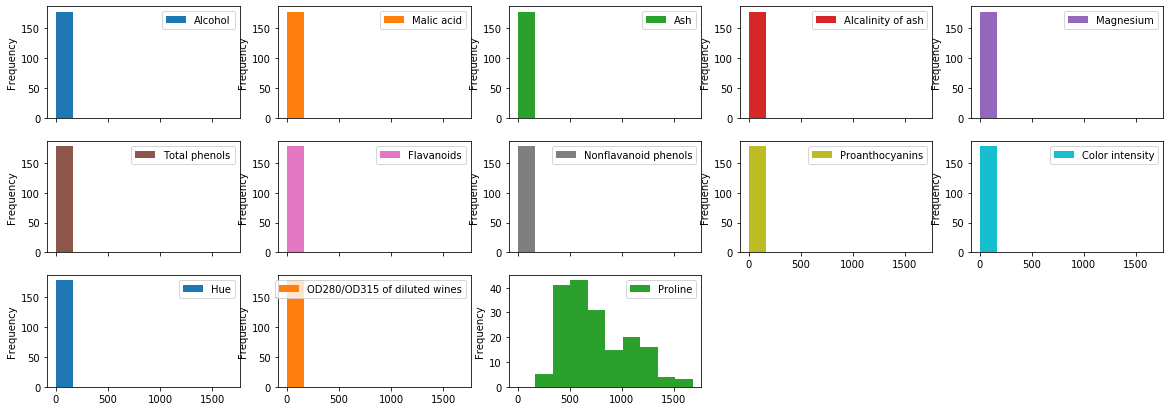

In [22]:
df.iloc[:,1:].plot(kind='hist', subplots=True, figsize=(20,7), layout=(3, 5))

In [38]:
#train test split
y = df[['Class']]
X = df.iloc[:,1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape)

(142, 13) (36, 13)


In [39]:
#for stacking, its optimal to pick models that are vastly different from each other - less correlated models give better results
models = [
    KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
    RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=100, max_depth=3),
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, n_estimators=100, max_depth=3)
]

In [40]:
S_train, S_test = stacking(models,
                           X_train, y_train, X_test,
                           regression=False,
                           mode='oof_pred_bag',
                           needs_proba=False,
                           save_dir=None,
                           metric=accuracy_score,
                           n_folds=4,
                           stratified=True,
                           shuffle=True,
                           random_state=0,
                           verbose=2)

C:\Users\kparekh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


task:         [classification]
n_classes:    [3]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.75675676]
    fold  1:  [0.75000000]
    fold  2:  [0.62857143]
    fold  3:  [0.64705882]
    ----
    MEAN:     [0.69559675] + [0.05819919]
    FULL:     [0.69718310]

model  1:     [RandomForestClassifier]
    fold  0:  [0.97297297]
    fold  1:  [1.00000000]
    fold  2:  [1.00000000]
    fold  3:  [1.00000000]
    ----
    MEAN:     [0.99324324] + [0.01170305]
    FULL:     [0.99295775]

model  2:     [XGBClassifier]
    fold  0:  [0.94594595]
    fold  1:  [0.97222222]
    fold  2:  [0.97142857]
    fold  3:  [1.00000000]
    ----
    MEAN:     [0.97239918] + [0.01912166]
    FULL:     [0.97183099]



In [41]:
model = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1,
                      n_estimators=500, max_depth=3)

model = model.fit(S_train, y_train)
y_pred = model.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

Final prediction score: [0.97222222]


C:\Users\kparekh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kparekh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Stacking should be used for the sole purpose of improving predictive performance. The goal is to use different models that account for different types of variations and use the output as an input. If the end goal is to produce a model that is interpretable then this is not a good choice. Also, if the results of a stacked model are not better than any individual model then maybe the models chosen to create input predictions are too similar.**